In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
import seaborn as sns


In [2]:
np.random.seed(42)

# Define the mean vectors for four Gaussian distributions
mean_1 = np.array([0, 0, 0])
mean_2 = np.array([6, 6, 6])
mean_3 = np.array([12, 3, 3])
mean_4 = np.array([6, 9, 3])

# Define identical covariance matrices for all Gaussians with variance 9 in each dimension
cov_matrix_1 = cov_matrix_2 = cov_matrix_3 = cov_matrix_4 = np.eye(3) * 9  # Standard deviation is 3

# Set up class priors for each class
prior_1 = 0.3  # Probability of choosing class 1
prior_2 = 0.3  # Probability of choosing class 2
prior_3 = 0.4  # Probability of choosing class 3

# Define class-conditional pdfs
f_X_given_Y1 = multivariate_normal(mean=mean_1, cov=cov_matrix_1)
f_X_given_Y2 = multivariate_normal(mean=mean_2, cov=cov_matrix_2)

# Define f_X_given_Y3 as a function that takes x as input
def f_X_given_Y3(x):
    return 0.5 * multivariate_normal.pdf(x, mean=mean_3, cov=cov_matrix_3) + \
           0.5 * multivariate_normal.pdf(x, mean=mean_4, cov=cov_matrix_4)

# Calculate and print distances between each pair of means to ensure significant overlap
dist_1_2 = np.linalg.norm(mean_1 - mean_2)
dist_1_3 = np.linalg.norm(mean_1 - mean_3)
dist_1_4 = np.linalg.norm(mean_1 - mean_4)
dist_2_3 = np.linalg.norm(mean_2 - mean_3)
dist_2_4 = np.linalg.norm(mean_2 - mean_4)
dist_3_4 = np.linalg.norm(mean_3 - mean_4)

print(f"Distance between mean1 and mean2: {dist_1_2:.2f}")
print(f"Distance between mean1 and mean3: {dist_1_3:.2f}")
print(f"Distance between mean1 and mean4: {dist_1_4:.2f}")
print(f"Distance between mean2 and mean3: {dist_2_3:.2f}")
print(f"Distance between mean2 and mean4: {dist_2_4:.2f}")
print(f"Distance between mean3 and mean4: {dist_3_4:.2f}")

Distance between mean1 and mean2: 10.39
Distance between mean1 and mean3: 12.73
Distance between mean1 and mean4: 11.22
Distance between mean2 and mean3: 7.35
Distance between mean2 and mean4: 4.24
Distance between mean3 and mean4: 8.49


In [4]:

# Total number of samples to be generated
total_samples = 10000

# Generate samples for each class using the Gaussian parameters and class priors
samples_class1 = np.random.multivariate_normal(mean_1, cov_matrix_1, int(total_samples * prior_1))
samples_class2 = np.random.multivariate_normal(mean_2, cov_matrix_2, int(total_samples * prior_2))
# Class 3 samples come from a mixture of two Gaussians with equal contribution from each
samples_class3_part1 = np.random.multivariate_normal(mean_3, cov_matrix_3, int(total_samples * prior_3 * 0.5))
samples_class3_part2 = np.random.multivariate_normal(mean_4, cov_matrix_4, int(total_samples * prior_3 * 0.5))
samples_class3 = np.vstack((samples_class3_part1, samples_class3_part2))  # Combine the two sets of samples

# Initialize lists to store the dataset and associated class labels
dataset = []
class_labels = []

# Append generated samples and their labels to the lists
dataset.extend(samples_class1.tolist())  # Convert numpy array to list and add to dataset
class_labels.extend([1] * len(samples_class1))  # Add labels for class 1
dataset.extend(samples_class2.tolist())  # Convert numpy array to list and add to dataset
class_labels.extend([2] * len(samples_class2))  # Add labels for class 2
dataset.extend(samples_class3.tolist())  # Convert numpy array to list and add to dataset
class_labels.extend([3] * len(samples_class3))  # Add labels for class 3 (from the mixture)

# Convert the lists to numpy arrays for easier processing in subsequent steps
dataset = np.array(dataset)
class_labels = np.array(class_labels)

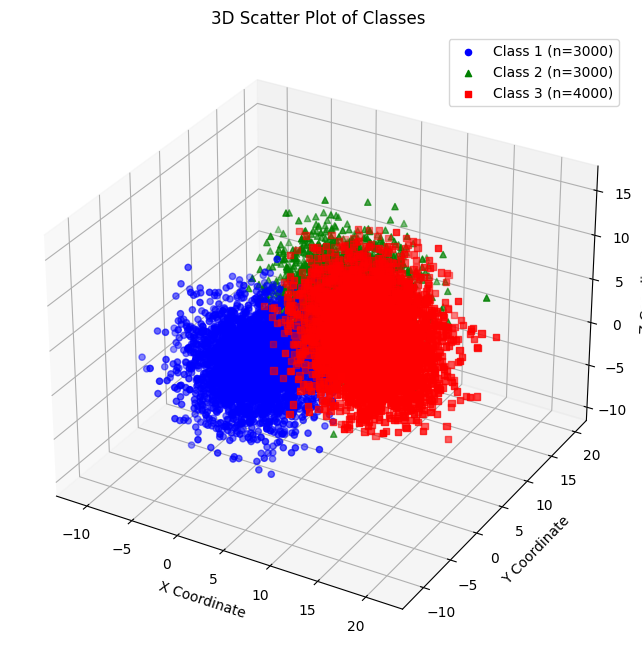

In [5]:
# Assume dataset and class_labels are already defined and filled
# Set up the figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Colors and markers for each class
colors = ['blue', 'green', 'red']
markers = ['o', '^', 's']  # Circle, Triangle, Square

# Plot each class
for class_id in [1, 2, 3]:
    indices = np.where(class_labels == class_id)[0]  # Get indices where class_labels equals class_id
    num_samples = len(indices)  # Number of samples in this class
    ax.scatter(dataset[indices, 0], dataset[indices, 1], dataset[indices, 2],
               c=colors[class_id - 1], marker=markers[class_id - 1],
               label=f'Class {class_id} (n={num_samples})')  # Include number of samples in label

# Labels and title
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')
ax.set_title('3D Scatter Plot of Classes')
ax.legend()

# Show the plot
plt.show()

In [6]:
def calculate_likelihood(sample: np.array, class_label: int) -> float:
    """
    Computes the likelihood of a sample given a class label

    Args:
        sample (np.array): A 3D data point
        class_label (int): Class label (1, 2, or 3)

    Raises:
        ValueError: If the class label is not recognized

    Returns:
        float: Likelihood of the sample under the given class label
    """
    if class_label == 1:
        return multivariate_normal.pdf(sample, mean_1, cov_matrix_1)
    elif class_label == 2:
        return multivariate_normal.pdf(sample, mean_2, cov_matrix_2)
    elif class_label == 3:
        return 0.5 * multivariate_normal.pdf(sample, mean_3, cov_matrix_3) + 0.5 * multivariate_normal.pdf(sample, mean_4, cov_matrix_4)
    else:
        raise ValueError("Invalid class label")

Standard Confusion Matrix:
[[2856   79   65]
 [  99 2119  782]
 [  71  749 3180]]


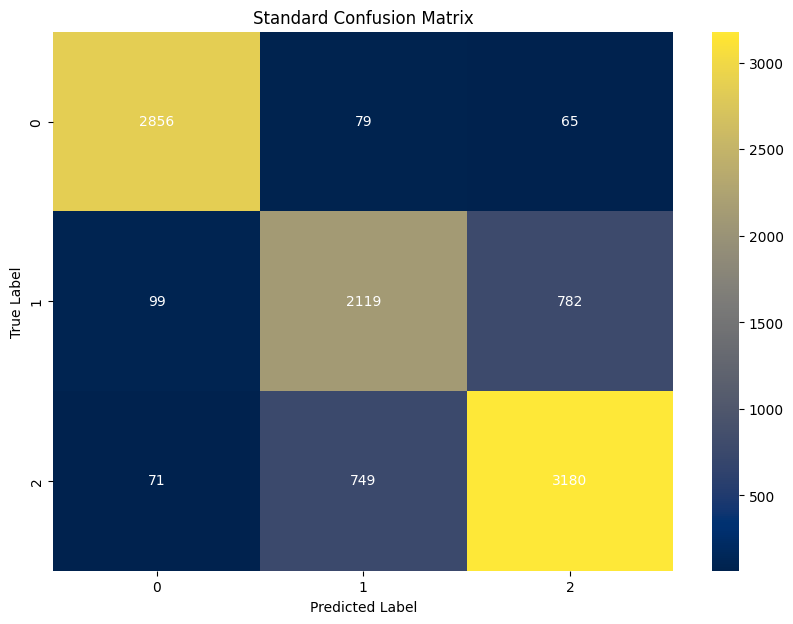

Confusion Matrix for Loss x10:
[[2654   27  319]
 [  47  362 2591]
 [  15   21 3964]]


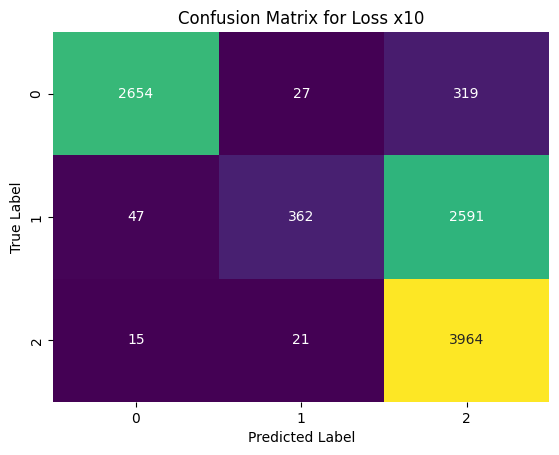

Confusion Matrix for Loss x100:
[[2159    1  840]
 [  10    5 2985]
 [   1    0 3999]]


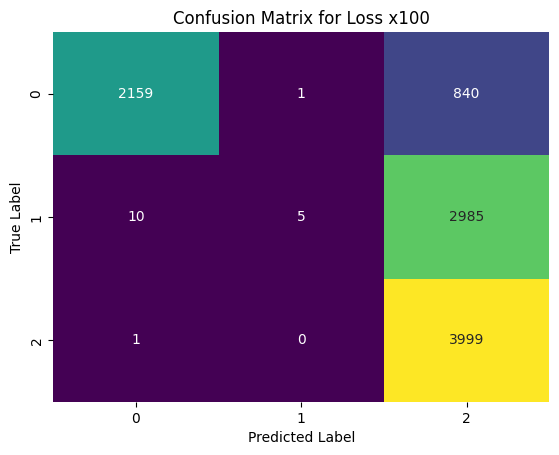

In [7]:
# Define the function to compute the minimum expected loss class
def compute_min_error_class(sample: np.array, loss_matrix: np.array) -> int:
    """
    Determine the class label that minimizes the probability of error for a given sample based on a loss matrix.

    Args:
        sample (np.array): A 3D data point.
        loss_matrix (np.array): A matrix representing loss associated with misclassification.

    Returns:
        int: Class label that minimizes the expected loss.
    """
    # Compute likelihoods for each class based on the sample
    likelihoods = [calculate_likelihood(sample, 1), calculate_likelihood(sample, 2), calculate_likelihood(sample, 3)]

    # Compute posterior probabilities using the likelihoods and predefined priors
    posterior_probs = [likelihoods[0] * prior_1, likelihoods[1] * prior_2, likelihoods[2] * prior_3]

    # Calculate expected loss for each class and return the class with the minimum loss
    expected_losses = [sum(posterior_probs[j] * loss_matrix[i][j] for j in range(3)) for i in range(3)]
    return np.argmin(expected_losses) + 1

# Example use-case of the function with a standard loss matrix
loss_matrix = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
conf_matrix = np.zeros((3, 3), dtype=int)  # Initialize confusion matrix

# Compute confusion matrix over the dataset
for i in range(total_samples):
    predicted_class = compute_min_error_class(dataset[i], loss_matrix)
    conf_matrix[class_labels[i] - 1][predicted_class - 1] += 1

# Output the confusion matrix
print("Standard Confusion Matrix:")
print(conf_matrix)

# Visualize the standard confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis', cbar=True, annot_kws={"color": 'white'})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Standard Confusion Matrix')
plt.show()

# Handling different loss scenarios: More severe penalties for misclassifying class 3
loss_matrices = {
    10: np.array([[0, 1, 10], [1, 0, 10], [1, 1, 0]]),
    100: np.array([[0, 1, 100], [1, 0, 100], [1, 1, 0]])
}
conf_matrices = {key: np.zeros((3, 3), dtype=int) for key in loss_matrices.keys()}

# Compute confusion matrices for different loss settings
for loss_factor, matrix in loss_matrices.items():
    for i in range(total_samples):
        predicted_class = compute_min_error_class(dataset[i], matrix)
        conf_matrices[loss_factor][class_labels[i] - 1][predicted_class - 1] += 1

    # Print and visualize the confusion matrices for each loss setting
    print(f"Confusion Matrix for Loss x{loss_factor}:")
    print(conf_matrices[loss_factor])

    # Plotting each confusion matrix
    sns.heatmap(conf_matrices[loss_factor], annot=True, fmt='d', cmap='viridis', cbar=False)
    plt.title(f'Confusion Matrix for Loss x{loss_factor}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

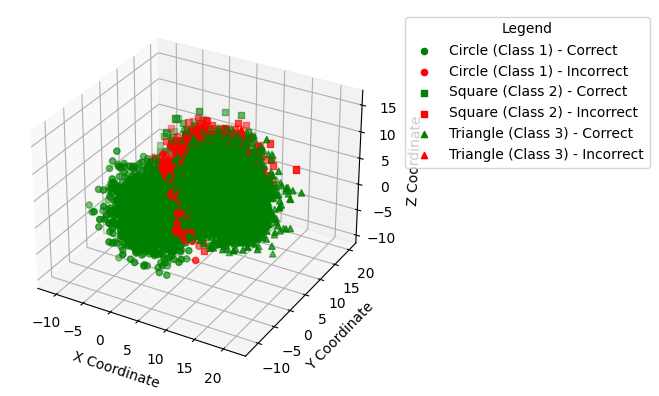

In [10]:
# Create the plot figure
visualization_fig = plt.figure()
axis_3d = visualization_fig.add_subplot(111, projection='3d')

# Define the loss matrix for 10x more importance to misclassification of class 3
loss_matrix_10 = np.array([[0, 1, 10], [1, 0, 10], [1, 1, 0]])

# Vectorized function to determine color and marker for each sample
def get_classification_details(data, labels, loss_matrix):
    predicted_labels = np.array([compute_min_error_class(sample, loss_matrix) for sample in data])
    colors = np.where(labels == predicted_labels, 'green', 'red')
    # Define marker shapes according to class: circle ('o'), square ('s'), triangle ('^')
    markers = np.choose(labels - 1, ['o', 's', '^'])  # Assuming labels are 1, 2, 3
    return colors, markers, predicted_labels

colors, markers, predicted_labels = get_classification_details(dataset, class_labels, loss_matrix_10)

# Class labels and their descriptions
class_labels_unique = [1, 2, 3]
marker_descriptions = ['Circle (Class 1)', 'Square (Class 2)', 'Triangle (Class 3)']

# Plot samples grouped by marker type and correctness to optimize plot calls
for i, marker in enumerate(['o', 's', '^']):
    for color in ['green', 'red']:
        mask = (markers == marker) & (colors == color)
        correctness = 'Correct' if color == 'green' else 'Incorrect'
        if np.any(mask):  # Check if there are any points to plot
            axis_3d.scatter(dataset[mask, 0], dataset[mask, 1], dataset[mask, 2],
                            c=color, marker=marker,
                            label=f'{marker_descriptions[i]} - {correctness}')

# Label the axes
axis_3d.set_xlabel('X Coordinate')
axis_3d.set_ylabel('Y Coordinate')
axis_3d.set_zlabel('Z Coordinate')

# Add a legend to explain markers and colors
axis_3d.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

In [11]:
# Loss matrices with different weights for classification errors
loss_matrix_10 = np.array([[0, 1, 10], [1, 0, 10], [1, 1, 0]])
loss_matrix_100 = np.array([[0, 1, 100], [1, 0, 100], [1, 1, 0]])

#Initialize confusion matrices for the different loss settings
conf_matrix_10 = np.zeros((3, 3), dtype=int)
conf_matrix_100 = np.zeros((3, 3), dtype=int)

# Compute the confusion matrix for the loss setting where class 3 misclassification costs 10 times more
for i in range(total_samples):
    predicted_label_10 = compute_min_error_class(dataset[i], loss_matrix_10)
    conf_matrix_10[class_labels[i] - 1][predicted_label_10 - 1] += 1

# # Print the confusion matrix for the loss setting where class 3 misclassification costs 10 times more
# print("Confusion Matrix for Loss x10:")
# print(conf_matrix_10)

# Compute the confusion matrix for the loss setting where class 3 misclassification costs 100 times more
for i in range(total_samples):
    predicted_label_100 = compute_min_error_class(dataset[i], loss_matrix_100)
    conf_matrix_100[class_labels[i] - 1][predicted_label_100 - 1] += 1

# # Print the confusion matrix for the loss setting where class 3 misclassification costs 100 times more
# print("Confusion Matrix for Loss x100:")
# print(conf_matrix_100)


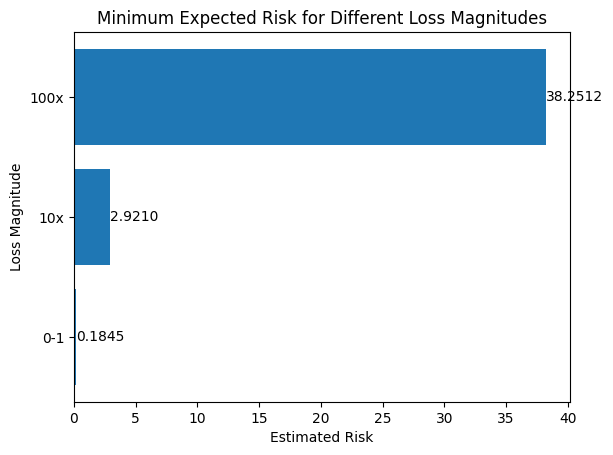

In [12]:
expected_risk_1 = 0
expected_risk_10 = 0
expected_risk_100 = 0

# Use the confusion matrices to estimate the minimum expected risk
for i in range(3):
    for j in range(3):
        expected_risk_1 += conf_matrix[i][j] * loss_matrix[i][j]
        expected_risk_10 += conf_matrix_10[i][j] * loss_matrix_10[i][j]
        expected_risk_100 += conf_matrix_100[i][j] * loss_matrix_100[i][j]

# Normalize the risks by the total number of samples
expected_risk_1 /= total_samples
expected_risk_10 /= total_samples
expected_risk_100 /= total_samples

risks = [expected_risk_1, expected_risk_10, expected_risk_100]
labels = ['0-1', '10x', '100x']
positions = [1, 2, 3]  # Positions on the y-axis

# Create the bar chart
risk_chart = plt.figure()
bars = plt.barh(positions, risks, tick_label=labels)
plt.xlabel('Estimated Risk')
plt.ylabel('Loss Magnitude')
plt.title('Minimum Expected Risk for Different Loss Magnitudes')

# Annotate each bar with the corresponding risk value
for bar, risk in zip(bars, risks):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{risk:.4f}',  # Format the risk value to 4 decimal places
             va='center')  # Vertical alignment

plt.show()